# YOLOv5 Approach
## Installing and importing dependencies

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

/home/keivalya/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model

Using cache found in /home/keivalya/.cache/torch/hub/ultralytics_yolov5_master
requirements: protobuf<=3.20.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /home/keivalya/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-6-13 Python-3.9.11 torch-1.8.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [3]:
import os
import time

In [4]:
IMAGES_PATH = os.path.join('Dataset', 'PCBData', 'group00041', 'images') #/data/images
labels = [ 'background', 'open', 'short', 'mousebite', 'spur', 'copper', 'pinhole']

In [8]:
%cd yolov5

/home/keivalya/Desktop/FSM-INT-2022/Codes/yolov5


In [11]:
%%python3 train.py --img 640 --batch 32 --epochs 300 --data dataset.yaml --weights yolov5s.pt --workers 2

UsageError: %%python3 is a cell magic, but the cell body is empty.


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/keivalya/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-6-16 Python-3.9.11 torch-1.8.2+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7029004 parameters, 0 gradients
Adding AutoShape... 


In [7]:
# img = os.path('Dataset/PCBData/group00041/00041/00041000_test.jpg')
img = os.path.join('Dataset','PCBData','group00041','00041','00041000_test.jpg')

In [10]:
results = model(img)
results.print()

image 1/1: 640x640 1 open, 1 short, 2 mousebites, 5 spurs, 2 coppers, 3 pinholes
Speed: 10.4ms pre-process, 236.5ms inference, 0.7ms NMS per image at shape (1, 3, 640, 640)


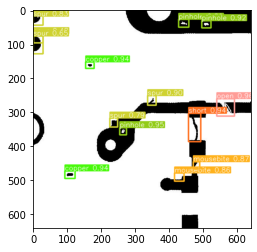

In [16]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))